In [11]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os, joblib,  missingno


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

from sklearn.pipeline import Pipeline, FeatureUnion
#from sklearn_features.transformers import DataFrameSelector


from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import VotingRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from xgboost import XGBRegressor


# Load the Dataset

In [12]:
File_PATH = os.path.join(os.getcwd(), 'housing.csv')
df_housing = pd.read_csv(File_PATH)

df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

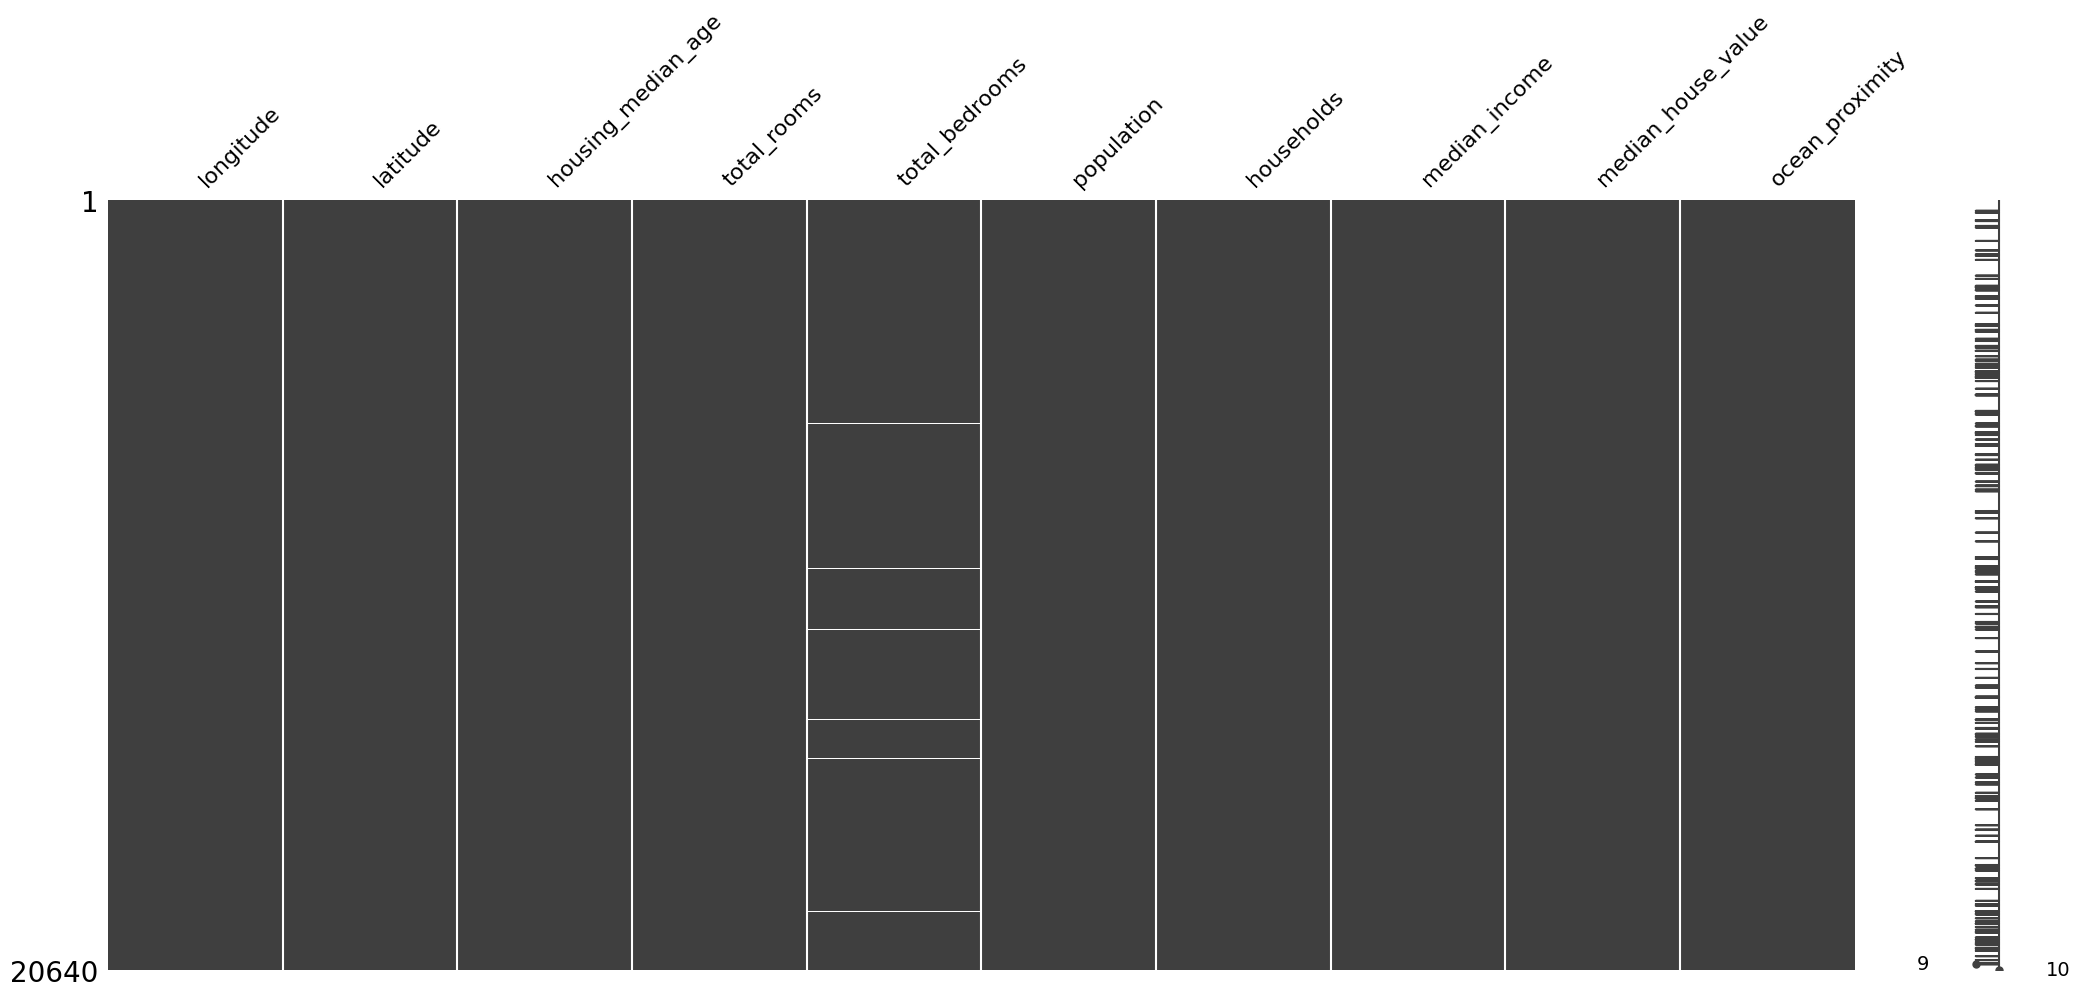

In [16]:
missingno.matrix(df_housing)

<Axes: >

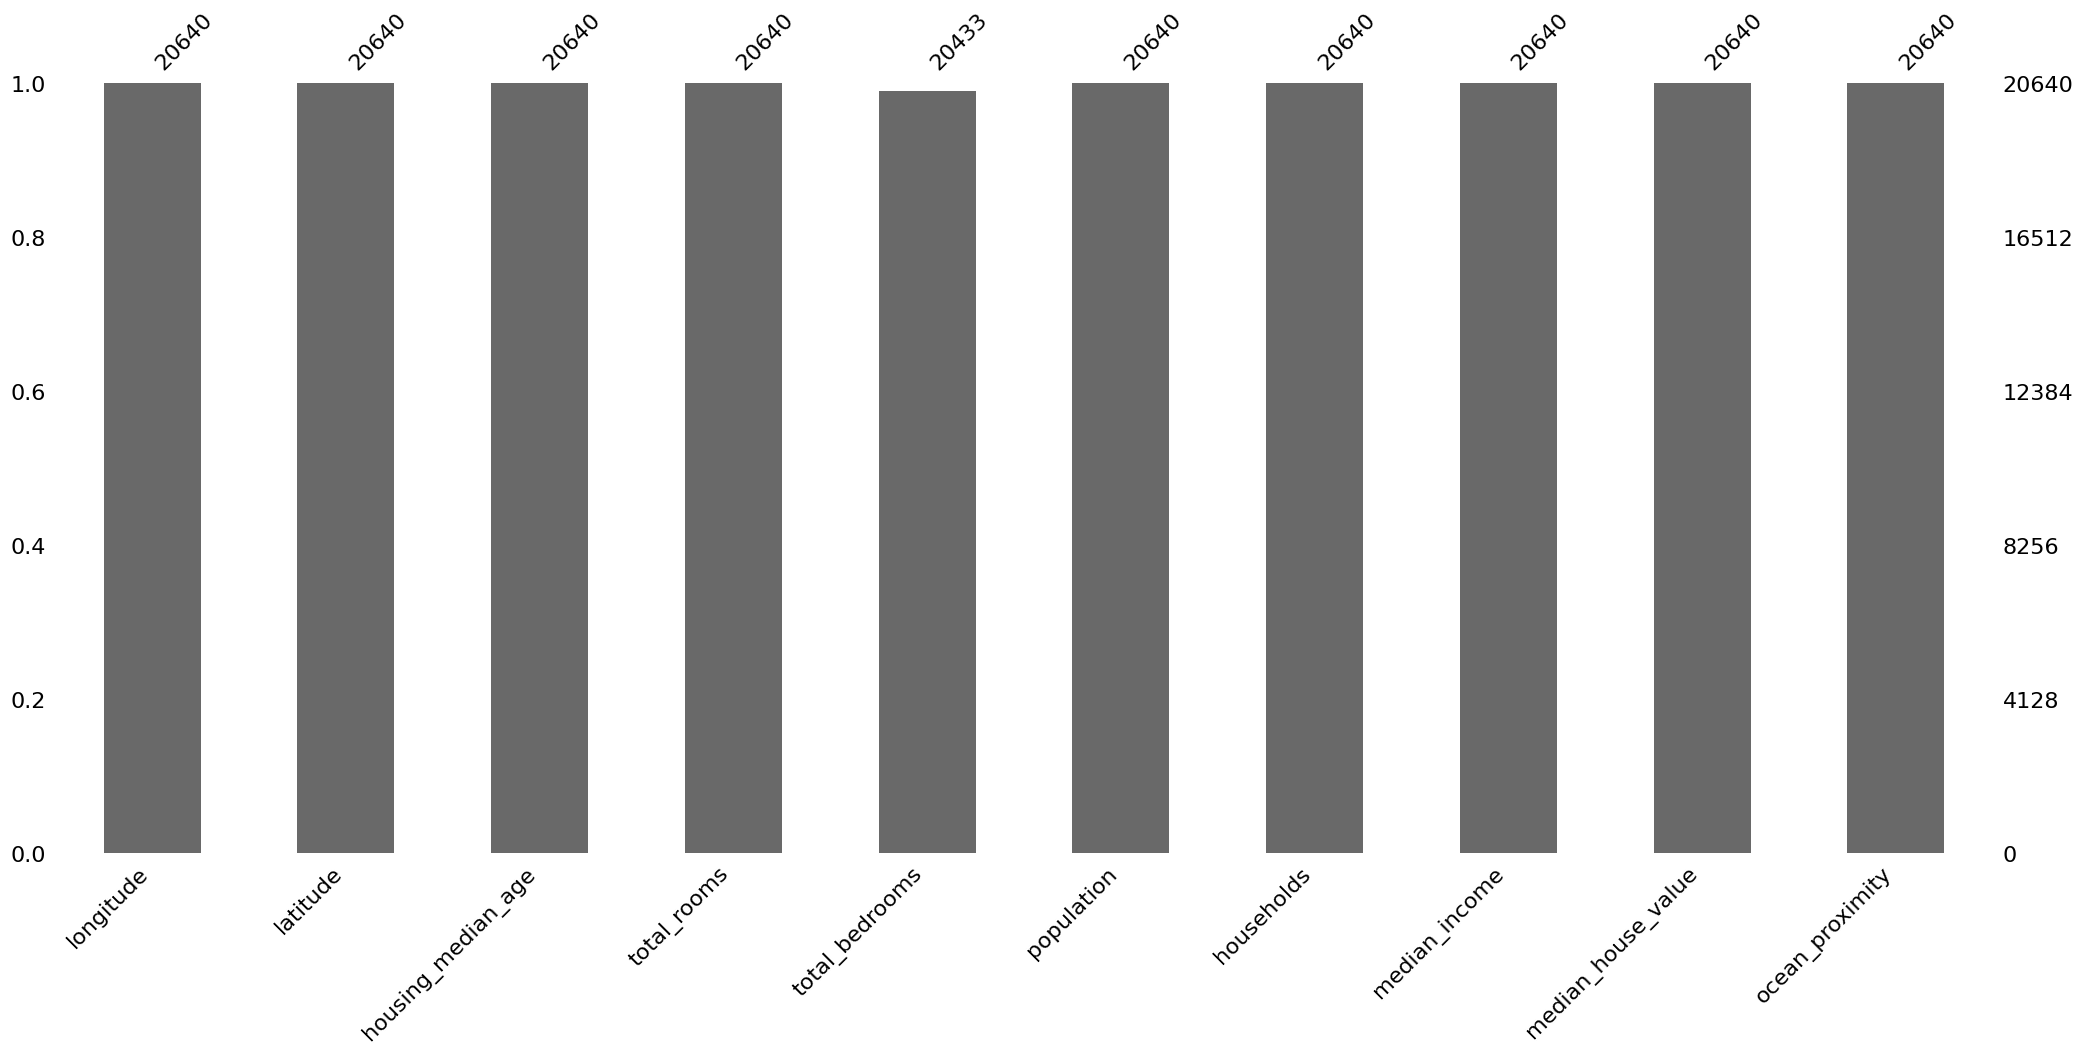

In [17]:
missingno.bar(df_housing)

* > `total_bedrooms  has missing values equals 207,
 All dataset features are floats except ocean_proximity (object)`

 # Exploatory DataAnalysis


-- Univariante Visualization (One Feature)

In [18]:
#  Univariate Visualization
df_housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

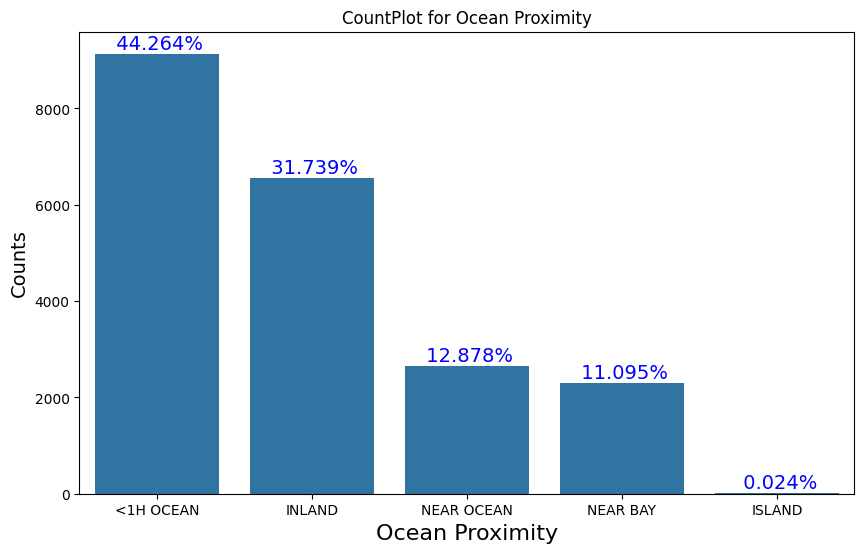

In [19]:
plt.figure(figsize=(10,6))
order = df_housing['ocean_proximity'].value_counts()
sns.countplot(x='ocean_proximity', data=df_housing, order=order.index)
plt.title('CountPlot for Ocean Proximity')
plt.xlabel('Ocean Proximity', fontsize=16, color='k')
plt.ylabel('Counts', fontsize=14, color='k')

for i in range(len(order)):
    count = order.values[i]
    count_txt = f'{count*100/len(df_housing): .3f}%'
    plt.text(x= i, y =count+100, s = count_txt, ha='center',color='blue', fontsize=14)
plt.show()

In [20]:
# Rename (<1H OCEAN)
df_housing['ocean_proximity'] = df_housing['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN')
df_housing['ocean_proximity'].unique()

array(['NEAR BAY', '1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

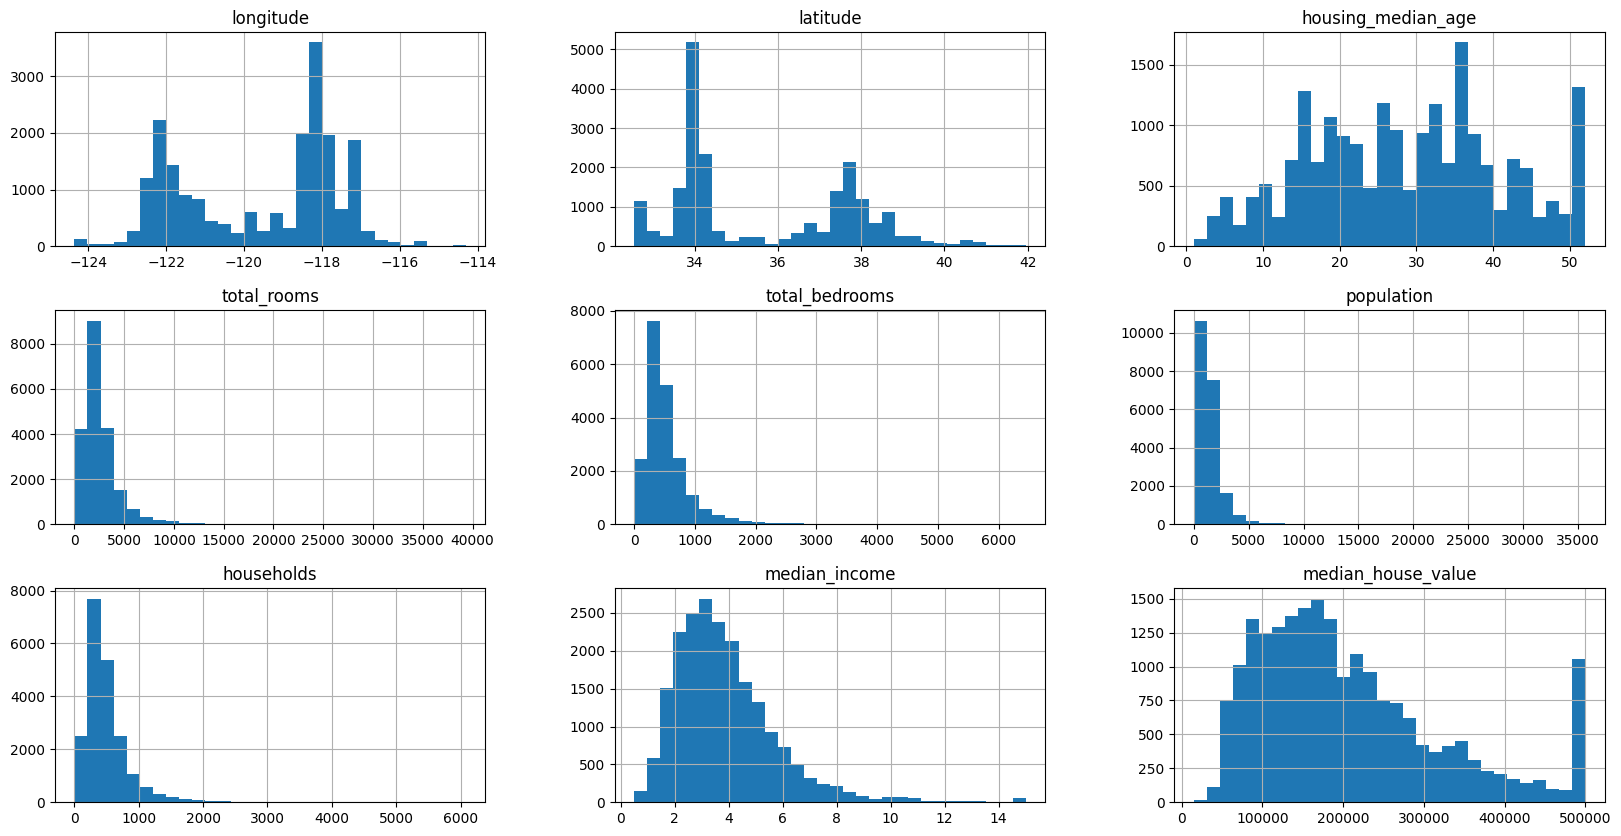

In [21]:
df_housing.hist(bins=30, figsize=(20,10))
plt.show()

* > Most of the features are skewed

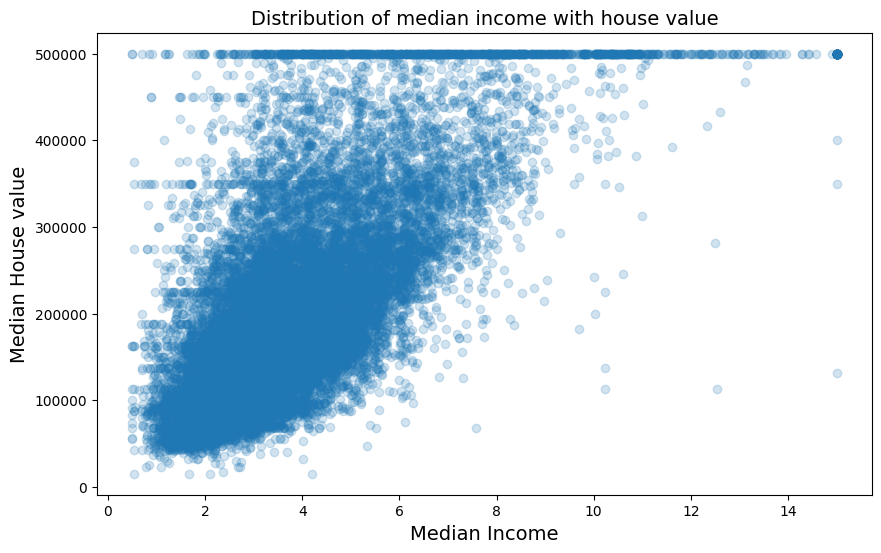

In [23]:
# Median_Income vs median_house_value
plt.figure(figsize=(10,6))
plt.scatter(df_housing['median_income'],df_housing['median_house_value'], alpha=0.2)
plt.title('Distribution of median income with house value', fontsize=14, c='k')
plt.xlabel('Median Income', fontsize=14, c='k')
plt.ylabel('Median House value', fontsize=14)
plt.show()

* >Seems high correlation 

In [24]:
df_housing['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [25]:
house_bins = pd.cut(x=df_housing['median_house_value'], bins=[-np.inf,100000, 200000,300000,400000,500000,np.inf],
        labels=['0-100k','100k-200k','300k-400k','400k-500k','500k-600k','600k<'])

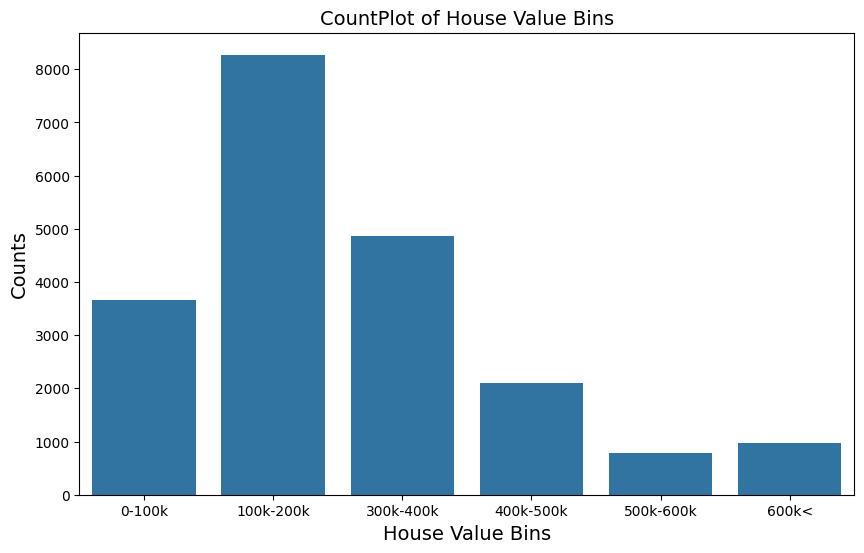

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x=house_bins)
plt.title('CountPlot of House Value Bins', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14,c='k')
plt.show()

* >Majority of the features lies in 100k to 200k 

In [27]:
# Visualizing the range of numbers
df_housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

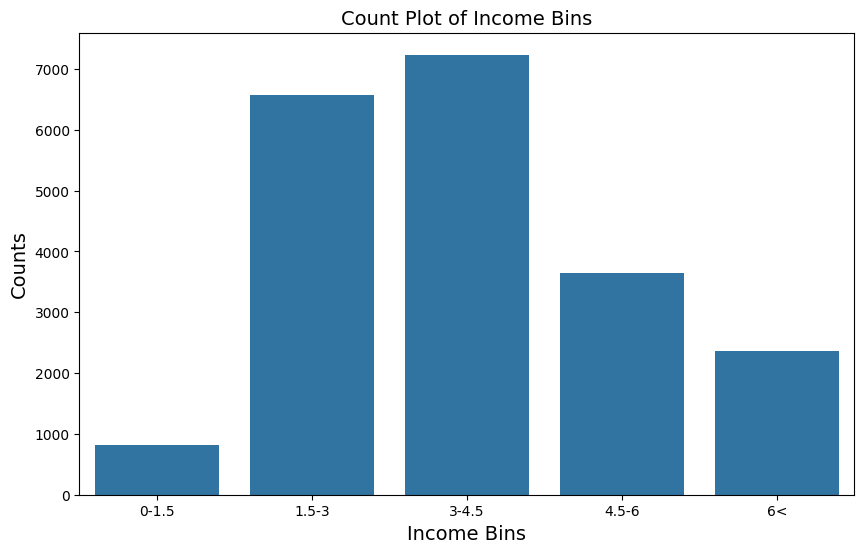

In [28]:
# Cutting the income to bins

income_bins = pd.cut(x=df_housing['median_income'],
                     bins = [-np.inf, 1.5, 3,4.5,6, np.inf],
                     labels=['0-1.5','1.5-3','3-4.5','4.5-6','6<'])

plt.figure(figsize=(10,6))
sns.countplot(x=income_bins)
plt.title('Count Plot of Income Bins', fontsize=14, c='k')
plt.xlabel('Income Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

* > Bivariate Visualization

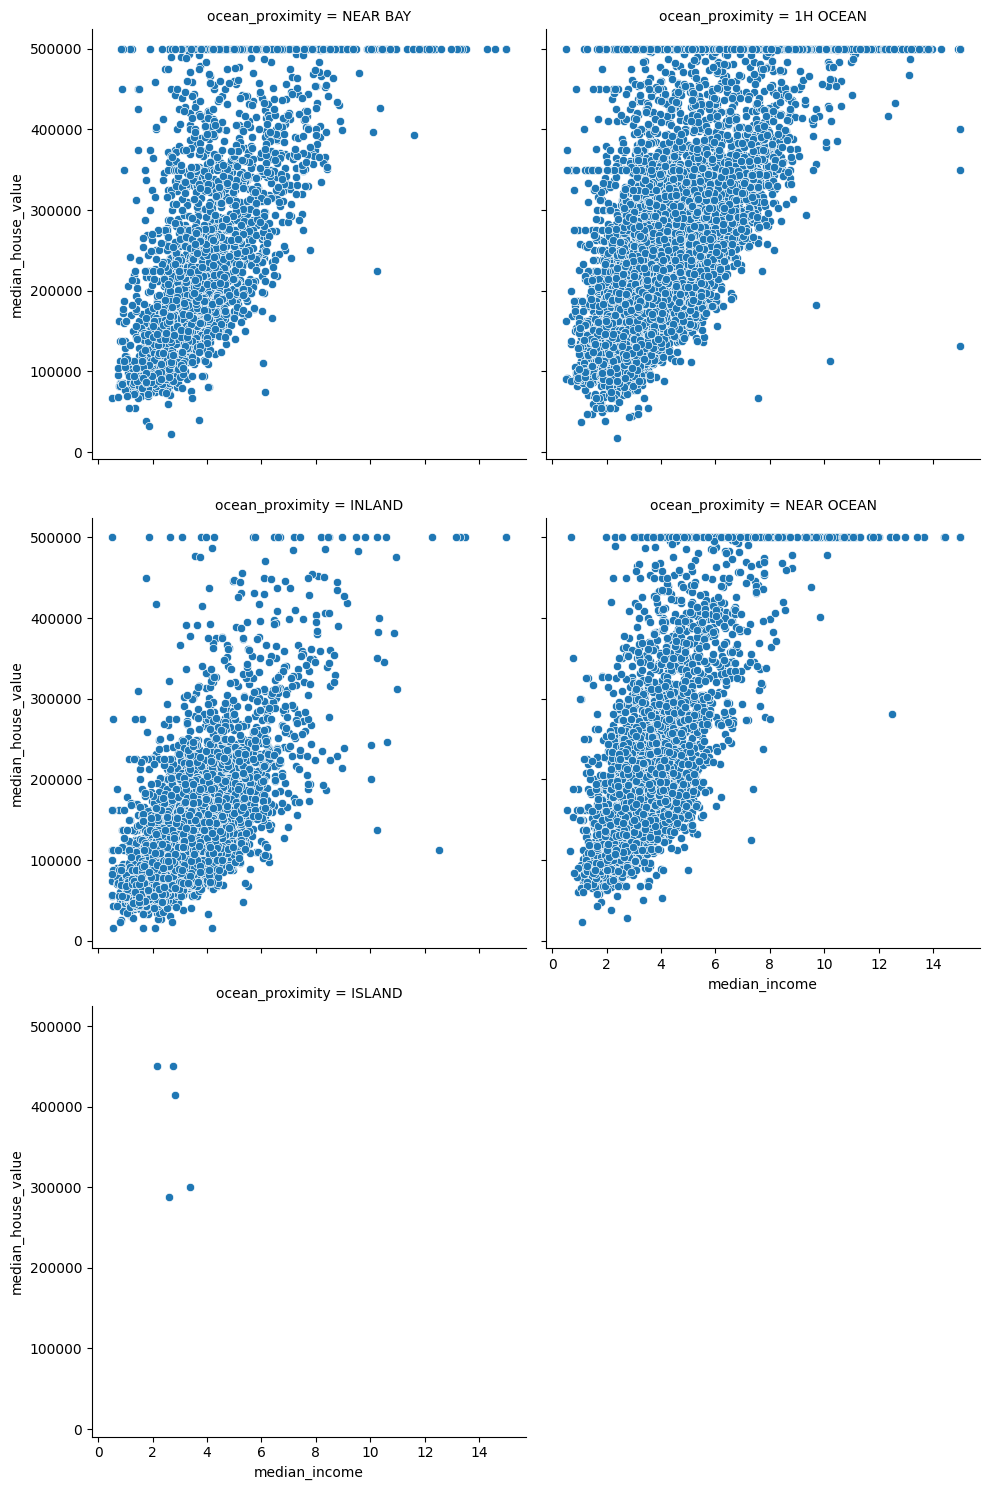

In [29]:
# MedianIncome & Median_house_value at each ocean Proximity
sns.relplot(x='median_income', y='median_house_value', data =df_housing, col ='ocean_proximity', kind='scatter',col_wrap=2)

> Changes in ocean_proximity has minor or no effect on the correlation between median_house_income & median_income

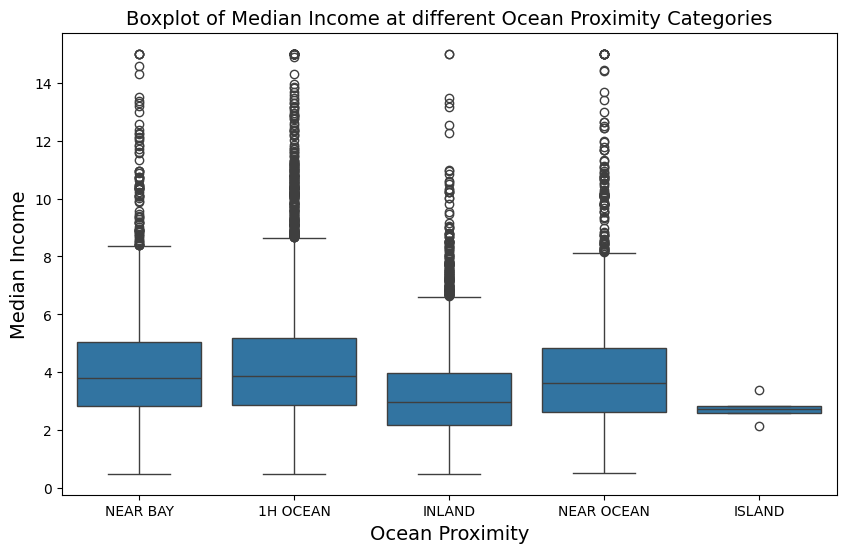

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(y='median_income', x='ocean_proximity', data= df_housing)
plt.title('Boxplot of Median Income at different Ocean Proximity Categories', fontsize=14)
plt.xlabel('Ocean Proximity', fontsize=14)
plt.ylabel('Median Income', fontsize=14)
plt.show()

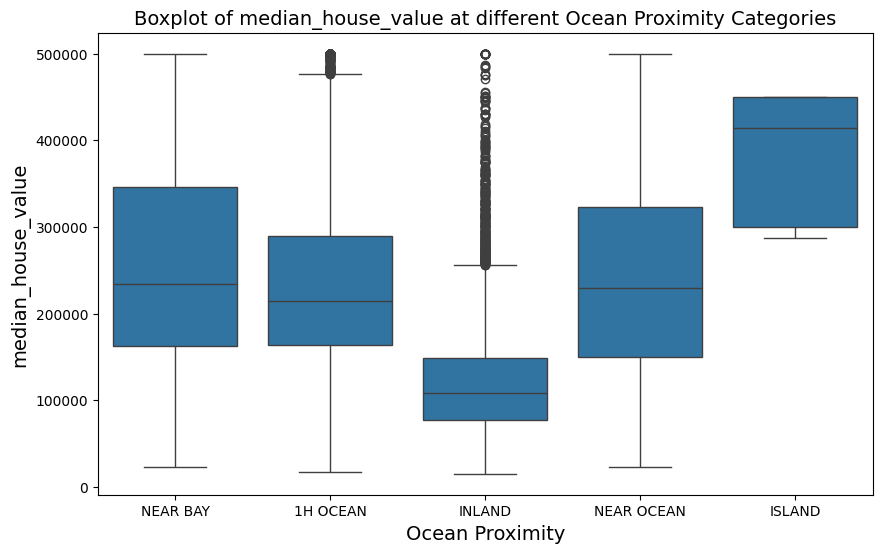

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(y='median_house_value', x='ocean_proximity', data= df_housing)
plt.title('Boxplot of median_house_value at different Ocean Proximity Categories', fontsize=14)
plt.xlabel('Ocean Proximity', fontsize=14)
plt.ylabel('median_house_value', fontsize=14)
plt.show()

* > From the plot the distribution of the median_income & median_house_value is almost the same at different OceanProximity values.

> MultiVariate Visualization

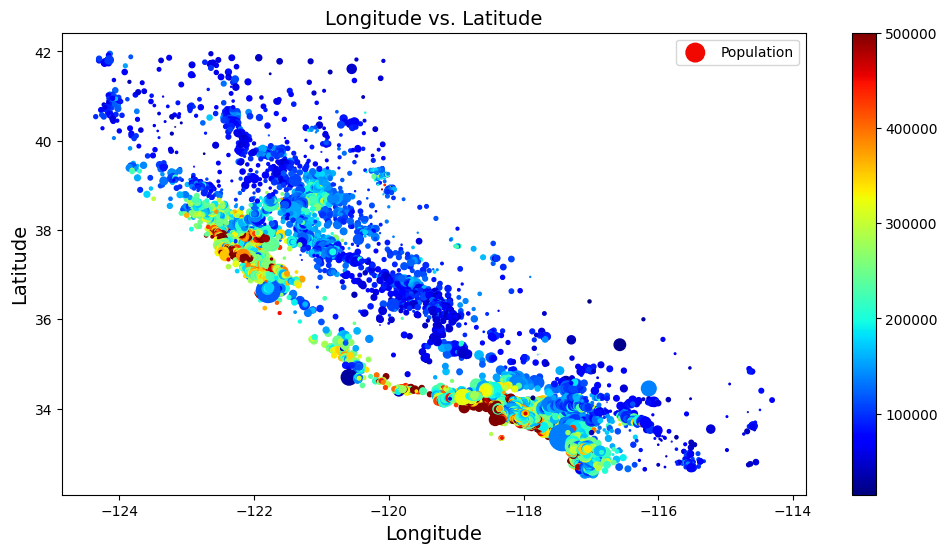

In [32]:
plt.figure(figsize=(12,6))
sc =plt.scatter(x=df_housing['longitude'],y=df_housing['latitude'],s=df_housing['population']/100,
            c=df_housing['median_house_value'], cmap=plt.get_cmap('jet'), label='Population')
plt.colorbar(sc)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('Longitude vs. Latitude', fontsize =14)
plt.legend()
plt.show()

# Feature Engineering

In [33]:
# Pearson Correlation : handels only linear Correlation (Can not handle non linear correlations)
numeric_df = df_housing.select_dtypes(include=['float64', 'int64'])

numeric_df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

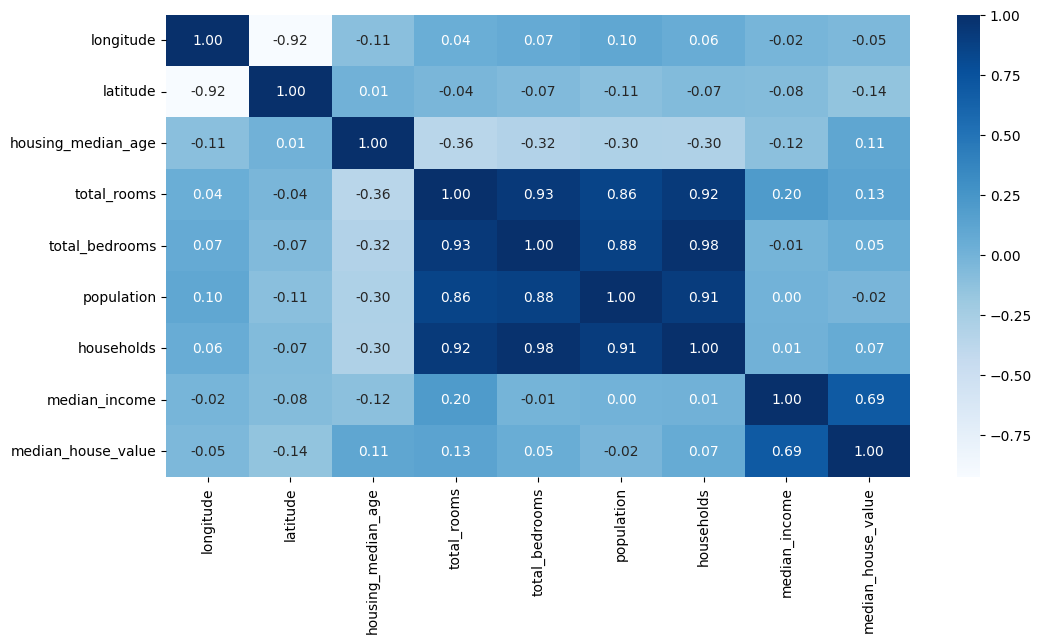

In [34]:
plt.figure(figsize =(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

In [37]:
# Adding new Features 
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedrooms_per_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']

In [38]:
numeric_df = df_housing.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

# Split the DataSet

In [39]:
X = df_housing.drop(columns='median_house_value', axis=1) # Features
y = df_housing['median_house_value'] # target

* > Will use cross-Validation -> for validation instead of splitting train to tain and valid

In [40]:

X_train, X_test, y_train, y_test=train_test_split(X,y, shuffle=True, test_size=0.2, random_state=42)

In [42]:
print('X_train_Shape', X_train.shape)
print('y_train_Shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test_shape', y_test.shape)

X_train_Shape (16512, 12)
y_train_Shape (16512,)
X_test shape (4128, 12)
y_test_shape (4128,)


* > Handling Null Values

In [43]:
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['float32','float64','int32','int64']]
cat_cols = [col for col in X_train.columns if X_train[col].dtype not in ['float32','float64','int32','int64']]

In [44]:
cat_cols

['ocean_proximity']

In [45]:
num_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_rooms',
 'population_per_household']

<Axes: >

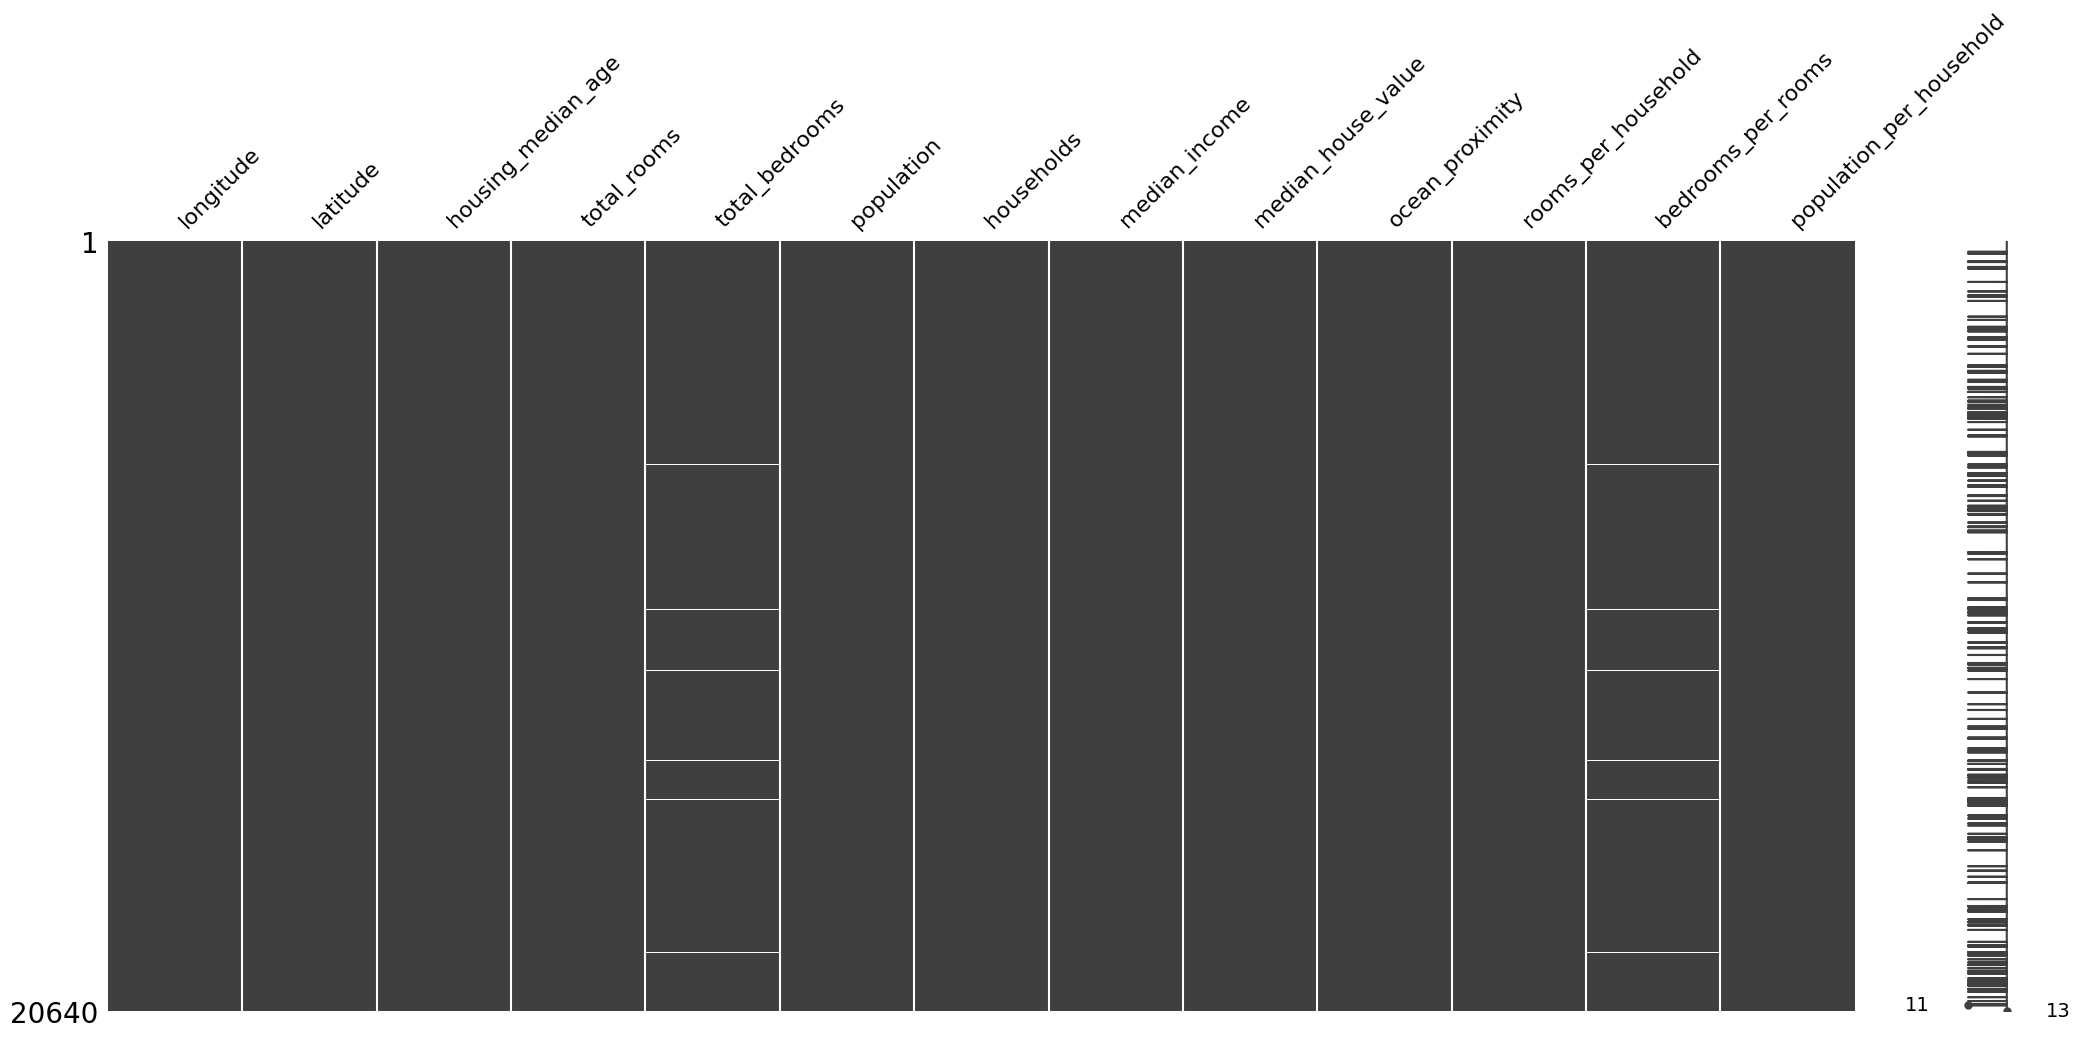

In [46]:
missingno.matrix(df_housing)

In [49]:
# Imputing the Null Values
imputer = SimpleImputer(strategy='median')
X_train_filled =imputer.fit_transform(X_train[num_cols])
X_test_filled = imputer.transform(X_test[num_cols])


In [50]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.12900000e+03,
        4.37000000e+02,  1.16700000e+03,  4.10000000e+02,  3.54580000e+00,
        5.23587365e+00,  2.02807652e-01,  2.81723971e+00])

In [51]:
X_train[num_cols].median(axis=0)

longitude                   -118.510000
latitude                      34.260000
housing_median_age            29.000000
total_rooms                 2129.000000
total_bedrooms               437.000000
population                  1167.000000
households                   410.000000
median_income                  3.545800
rooms_per_household            5.235874
bedrooms_per_rooms             0.202808
population_per_household       2.817240
dtype: float64

* > Standardize the Features

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filled)
X_test_scaled = scaler.transform(X_test_filled)

In [53]:
scaler.mean_

array([-1.19582290e+02,  3.56431492e+01,  2.86082849e+01,  2.64200478e+03,
        5.38496851e+02,  1.42645300e+03,  4.99986919e+02,  3.88075426e+00,
        5.43523502e+00,  2.12857974e-01,  3.09696119e+00])

In [54]:
X_train_filled.mean(axis=0)

array([-1.19582290e+02,  3.56431492e+01,  2.86082849e+01,  2.64200478e+03,
        5.38496851e+02,  1.42645300e+03,  4.99986919e+02,  3.88075426e+00,
        5.43523502e+00,  2.12857974e-01,  3.09696119e+00])

* > Pipeline

In [56]:
# Order Matters inside Pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scalar', StandardScaler())
     ])

X_train_num = num_pipeline.fit_transform(X_train[num_cols]) #train
X_test_num = num_pipeline.transform(X_test[num_cols]) #test

* > Categorical Features

In [57]:
# Squeeze decrease dimension ex 2d to 1d
lbl_encoder = LabelEncoder()
lbl_encoder.fit(np.squeeze(X_train[cat_cols].values))



X_train_encoded = lbl_encoder.transform(np.squeeze(X_train[cat_cols].values))
X_test_encoded = lbl_encoder.transform(np.squeeze(X_test[cat_cols].values))

In [58]:
lbl_encoder.classes_

array(['1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

* > Sometimes LabelEncoder get Biased towards the classes assigned with higher values

In [59]:
ohe = OneHotEncoder()
ohe.fit(X_train[cat_cols].values)


X_train_encoded = ohe.fit_transform(X_train[cat_cols].values)
X_test_encoded = ohe.transform(X_test[cat_cols].values)

In [60]:
X_train_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [61]:
X_train_encoded.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], shape=(16512, 5))

* > Pipeline Category

In [62]:
categ_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe',OneHotEncoder())
])


X_train_categ = categ_pipeline.fit_transform(X_train[cat_cols])
X_test_categ = categ_pipeline.transform(X_test[cat_cols])



* >Simplifying the Pipelines

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names]


In [104]:
num_pipeline = Pipeline(steps=[
    ('selector', DataFrameSelector(num_cols)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scalar', StandardScaler())
     ])

categ_pipeline = Pipeline(steps=[
     ('selector', DataFrameSelector(cat_cols)),
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe',OneHotEncoder())
])


total_pipeline = FeatureUnion(transformer_list=[
    ('num',num_pipeline ),
    ('categ',categ_pipeline)
])


In [105]:
X_train_final = total_pipeline.fit_transform(X_train)
X_test_final = total_pipeline.transform(X_test)

In [106]:
X_train_final.shape , X_test_final.shape

((16512, 16), (4128, 16))

In [107]:
y_train.shape , y_test.shape

((16512,), (4128,))

# Building Models

* > Evaluation metric : RMSE

>> 1. Linear Regression

In [69]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [70]:
# thetas & bias
lin_reg.coef_ , lin_reg.intercept_

(array([-56276.06174794, -56638.23298124,  14122.32250681,   5881.10708662,
          5307.66427401, -46320.28411686,  40233.72746013,  78904.44708259,
          7699.44287347,  16809.10125347,    750.35907244, -18666.47569829,
        -53617.8458995 , 112060.24444041, -24109.1827923 , -15666.74005047]),
 np.float64(237125.77914742718))

In [71]:
mse_scores_linear =cross_val_score(estimator=lin_reg,
                                    X=X_train_final, y=y_train, 
                                    cv=5, scoring='neg_mean_squared_error')

# returns 5 nums as cv=5
mse_scores_linear = np.sqrt(mse_scores_linear *-1)
mse_scores_linear


array([68043.87519618, 66595.38059599, 66934.79346354, 66857.36209679,
       70812.75307774])

In [72]:
mse_scores_linear.mean()

np.float64(67848.8328860463)

In [73]:
y_pred_lin = cross_val_predict(estimator=lin_reg,
                  X=X_train_final, y=y_train, 
                  cv=5, method='predict')
y_pred_lin

array([181233.18529946, 289117.612032  , 245822.26832817, ...,
       194789.46491564, 278573.17244962, 272291.36472152], shape=(16512,))

In [74]:
np.sqrt(mean_squared_error(y_train,y_pred_lin))

np.float64(67866.76451218547)

* >. SGDRegressor

In [75]:
sgd_reg = SGDRegressor(penalty='l2', alpha=0.0001,
                        shuffle= True, max_iter=10000,
                        random_state=42, eta0=0.001)
sgd_reg.fit(X_train_final, y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,10000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [76]:
mse_scores_sgd = cross_val_score(estimator=sgd_reg, X = X_train_final, y=y_train,
                                 cv=5, scoring='neg_mean_squared_error')

mse_scores_sgd = -1 * mse_scores_sgd
rmse_scores_sgd = np.sqrt(mse_scores_sgd)
rmse_scores_sgd.mean()

np.float64(68043.57734856839)

* > Ridge : Regression using Ordinary least Squares, but regularized version of LinearRegression using (L2 Norm)

In [77]:
ridge_reg = Ridge(alpha=0.9)
ridge_reg.fit(X_train_final, y_train)

,alpha,0.9
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [78]:
mse_scores_ridge = cross_val_score(estimator=ridge_reg, X = X_train_final, y=y_train,
                                 cv=5, scoring='neg_mean_squared_error')

mse_scores_ridge = -1 * mse_scores_ridge
rmse_scores_ridge = np.sqrt(mse_scores_ridge)
rmse_scores_ridge.mean()

np.float64(67847.48169231543)

* > Lasso : Regression using Ordinary Least Squares, but regularized version of LinearRegression using (L1-Norm)

In [79]:
lasso_reg = Lasso(alpha=1, max_iter=10000)
lasso_reg.fit(X_train_final, y_train)

,alpha,1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,10000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [80]:
lasso_reg.coef_ , lasso_reg.intercept_

(array([-56258.34084407, -56622.79594484,  14121.44451376,   5872.43384056,
          5328.24716914, -46306.3263051 ,  40207.04047635,  78904.87949095,
          7696.08815872,  16805.91277727,    747.97085587,      0.        ,
        -34955.88430558, 126603.01949549,  -5424.17018789,   2996.15379251]),
 np.float64(218460.10252570498))

-- zero means features useless : can be used as a Fetaure selection technique (Lasso)

In [81]:
mse_scores_lasso = cross_val_score(estimator=ridge_reg, X = X_train_final, y=y_train,
                                 cv=5, scoring='neg_mean_squared_error')

mse_scores_lasso = -1 * mse_scores_lasso
rmse_scores_lasso = np.sqrt(mse_scores_lasso)
rmse_scores_lasso.mean()

np.float64(67847.48169231543)

* > ElasticNet : Regression using Ordinary Least Squares, but regularized version of LinearRegression using both (L1-Norm & L2-Norm)

In [82]:
elasticNet_reg = ElasticNet(alpha=1, l1_ratio=0.5)
elasticNet_reg.fit(X_train_final,y_train)

,alpha,1
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [83]:
mse_scores_elasticNet = cross_val_score( estimator=elasticNet_reg, X= X_train_final, y = y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores_elasticNet = -1 * mse_scores_elasticNet

rmse_scores_elasticNet = np.sqrt(mse_scores_elasticNet)
rmse_scores_elasticNet.mean()

np.float64(78306.72193662028)

* > Polynomial Regression :  convert features to polynomial features before applying the model on

In [84]:
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X_train_final)

In [85]:
X_poly.shape

(16512, 152)

In [86]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
mse_scores_lin_reg_poly = cross_val_score( estimator=lin_reg_poly, X= X_train_final, y = y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores_lin_reg_poly = -1 * mse_scores_lin_reg_poly

rmse_scores_lin_reg_poly = np.sqrt(mse_scores_lin_reg_poly)
rmse_scores_lin_reg_poly.mean()

np.float64(67848.8328860463)

* > KNN: 
Note : Low n_neighbors ---> lead to OverFitting
       High n_neighbors ---> lead to Underfitting

In [88]:
# p=1 --> Manhattan distance, p=2 --> Euclidean distance
knn_reg = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2)
knn_reg.fit(X_train_final, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [89]:
mse_scores_lin_knn = cross_val_score( estimator=knn_reg, X= X_train_final, y = y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores_lin_knn = -1 * mse_scores_lin_knn

rmse_scores_lin_knn = np.sqrt(mse_scores_lin_knn)
rmse_scores_lin_knn.mean()

np.float64(61673.90524416217)

In [90]:
y_pred_knn = cross_val_predict(estimator=knn_reg, X=X_train_final,
                               y = y_train, cv=5, method ='predict')

rmse_pred_knn = np.sqrt(mean_squared_error(y_train, y_pred_knn))
rmse_pred_knn

np.float64(61682.59280272175)

* > Random Forest

In [91]:
# must add hyperparameters to avoid overfitting
forest_reg = RandomForestRegressor(n_estimators=150,max_depth=5, random_state=42,
                                   max_samples=0.8)
forest_reg.fit(X_train_final, y_train)

,n_estimators,150
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [92]:
rmse_scores_forest = cross_val_score(estimator=forest_reg, X=X_train_final, y=y_train,
                                     cv=5, scoring='neg_mean_squared_error')
rmse_scores_forest = -1 * rmse_scores_forest
rmse_scores_forest = np.sqrt(rmse_scores_forest)
rmse_scores_forest

y_pred_forest = cross_val_predict(estimator=forest_reg, X=X_train_final, y=y_train,
                                  cv=5, method='predict')

rmse_pred_forest = np.sqrt(mean_squared_error(y_train,y_pred_forest))
rmse_pred_forest

np.float64(63434.88008224064)

In [93]:
params_best_forest= {'n_estimators' : np.arange(100,500,50),
                     'max_depth' : np.arange(4,20,2),
                     'max_samples' : [0.7,0.8,0.9] 
                     }
# n_iter : select randomly ex.15 combination of the above combinations
search_forest = RandomizedSearchCV(estimator=forest_reg, param_distributions=params_best_forest,
                   n_iter=15,random_state=42, scoring='neg_mean_squared_error',
                   cv=5, verbose=5)

# verbose write down folds (Fitting 5 folds for each of 15 candidates, totalling 75 fits)
search_forest.fit(X_train_final,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END max_depth=6, max_samples=0.9, n_estimators=350;, score=-3634884151.266 total time=  12.4s
[CV 2/5] END max_depth=6, max_samples=0.9, n_estimators=350;, score=-3511902472.833 total time=  12.4s
[CV 3/5] END max_depth=6, max_samples=0.9, n_estimators=350;, score=-3659492334.969 total time=  12.5s
[CV 4/5] END max_depth=6, max_samples=0.9, n_estimators=350;, score=-3508147204.611 total time=  12.5s
[CV 5/5] END max_depth=6, max_samples=0.9, n_estimators=350;, score=-3706179832.587 total time=  12.5s
[CV 1/5] END max_depth=14, max_samples=0.9, n_estimators=100;, score=-2591698129.550 total time=  13.3s
[CV 2/5] END max_depth=14, max_samples=0.9, n_estimators=100;, score=-2699719261.178 total time=  13.2s
[CV 3/5] END max_depth=14, max_samples=0.9, n_estimators=100;, score=-2609075749.258 total time=  13.5s
[CV 4/5] END max_depth=14, max_samples=0.9, n_estimators=100;, score=-2543108653.424 total time=  13.4s
[CV 5/5]

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': array([ 4, 6..., 14, 16, 18]), 'max_samples': [0.7, 0.8, ...], 'n_estimators': array([100, 1...50, 400, 450])}"
,n_iter,15
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,5
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [94]:
search_forest.best_params_


{'n_estimators': np.int64(150), 'max_samples': 0.8, 'max_depth': np.int64(18)}

In [95]:
# to return model with best hyper parameters
best_forest_model =search_forest.best_estimator_

In [96]:
mse_scores_forest_tuned = cross_val_score( estimator=best_forest_model, X= X_train_final, y = y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores_forest_tuned = -1 * mse_scores_forest_tuned

rmse_scores_forest_tuned = np.sqrt(mse_scores_forest_tuned)
rmse_scores_forest_tuned.mean()

np.float64(50575.91059519808)

In [97]:
y_pred_forest_tuned = cross_val_predict(estimator=best_forest_model, X=X_train_final, y=y_train,
                                  cv=5, method='predict')

rmse_pred_forest_tuned = np.sqrt(mean_squared_error(y_train,y_pred_forest_tuned))
rmse_pred_forest_tuned

np.float64(50579.1341356987)

* >  Feature Importance using Random Forest:

In [98]:
# get first 11 features (numerical features, last one --> one hot encoding )
feat_import_forest ={}
for name, score in zip(num_cols,best_forest_model.feature_importances_[:11]):
    feat_import_forest[name] = score



In [99]:
keys_forest = feat_import_forest.keys()
value_forest = feat_import_forest.values()

In [100]:
df_feat_import_forest = pd.DataFrame({'Features' : keys_forest, 'Scores' : value_forest})
df_feat_import_forest = df_feat_import_forest.sort_values(by='Scores', ascending=False)
df_feat_import_forest

,Features,Scores
7,median_income,0.485411
10,population_per_household,0.121186
0,longitude,0.056293
1,latitude,0.054524
2,housing_median_age,0.044073
8,rooms_per_household,0.025652
9,bedrooms_per_rooms,0.023623
3,total_rooms,0.012273
4,total_bedrooms,0.011680
5,population,0.011447


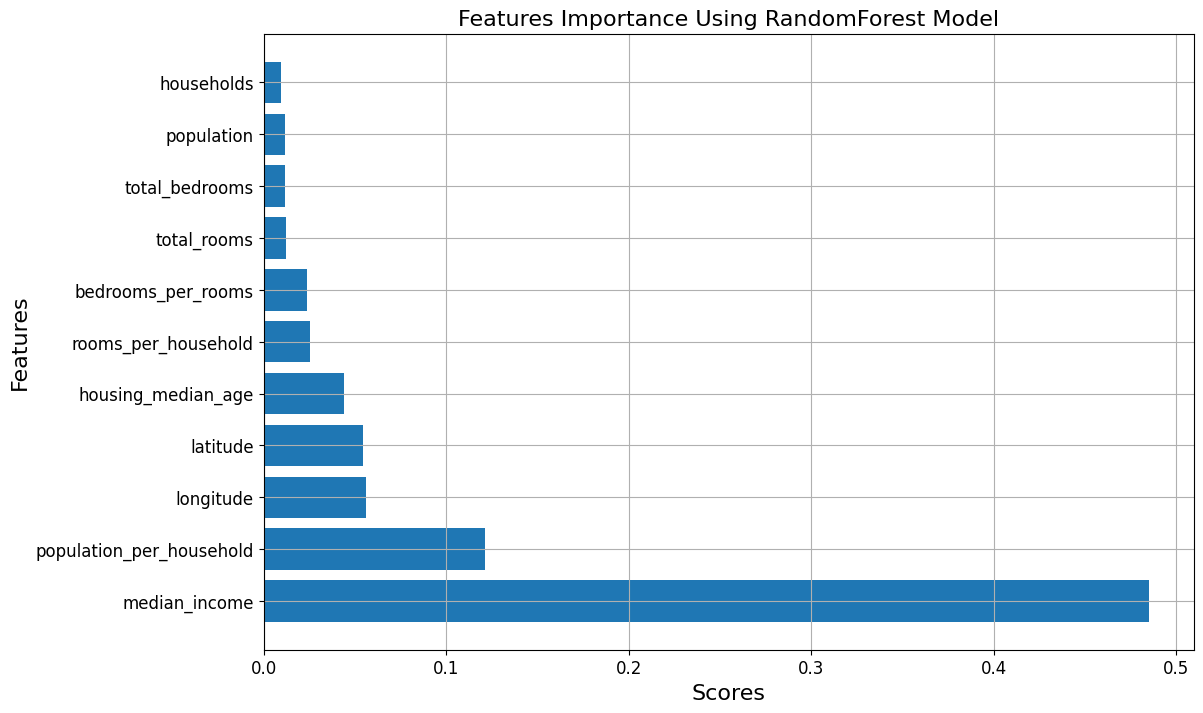

In [101]:
plt.figure(figsize=(12,8))
plt.barh(y=df_feat_import_forest['Features'], width=df_feat_import_forest['Scores'])
plt.title('Features Importance Using RandomForest Model' , fontsize=16, c='k')
plt.xlabel('Scores', fontsize=16, c='k')
plt.ylabel('Features', fontsize=16, c='k')
plt.xticks(c='k', fontsize=12)
plt.yticks(c='k', fontsize=12)
plt.grid('on')

* > XGBOOST
 ensemble learning (Library)

In [108]:
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, 
                       subsample=0.8)
xgb_reg.fit(X_train_final,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [109]:
rmse_scores_xgb = cross_val_score(estimator =xgb_reg, X=X_train_final, y=y_train,
                                  cv=5, scoring='neg_mean_squared_error')
rmse_scores_xgb = -1 * rmse_scores_xgb
rmse_scores_xgb = np.sqrt(rmse_scores_xgb)

print(rmse_scores_xgb)


y_pred_xgb = cross_val_predict(estimator = xgb_reg, X = X_train_final, y =y_train,
                               cv=5, method='predict')

rmse_pred_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
print(rmse_pred_xgb)

[47208.06660147 47979.36296019 47698.18544748 46428.52668787
 48101.11843215]
47486.98693040014


* > Tuning XGBOOST

In [111]:
params_xgb = {'n_estimators' : np.arange(100,200,50),
              'max_depth' : np.arange(4,15,2),
              'learning_rate' : [0.1,0.2],
              'sub_sample' : [0.8,0.9]}


grid_xgb =GridSearchCV(estimator=xgb_reg, param_grid=params_xgb, cv=5, verbose=2, scoring ='neg_mean_squared_error')


grid_xgb.fit(X_train_final,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, sub_sample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, sub_sample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, sub_sample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, sub_sample=0.9; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=150, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=4, n_estimators=150, sub_sample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=150, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=4, n_estimators=150, sub_sample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=150, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=4, n_estimators=150, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=150, sub_sample=0.9; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=4, n_estimators=150, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=150, sub_sample=0.9; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=4, n_estimators=150, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, sub_sample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, sub_sample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, sub_sample=0.9; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, sub_sample=0.9; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=150, sub_sample=0.8; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=150, sub_sample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=150, sub_sample=0.8; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=150, sub_sample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=150, sub_sample=0.8; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=150, sub_sample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=150, sub_sample=0.9; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=150, sub_sample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=150, sub_sample=0.9; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=150, sub_sample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, sub_sample=0.8; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, sub_sample=0.8; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, sub_sample=0.8; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, sub_sample=0.8; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, sub_sample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, sub_sample=0.9; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, sub_sample=0.9; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:00:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, sub_sample=0.9; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, sub_sample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, sub_sample=0.9; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, sub_sample=0.8; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, sub_sample=0.8; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, sub_sample=0.8; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, sub_sample=0.8; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, sub_sample=0.8; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, sub_sample=0.9; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, sub_sample=0.9; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, sub_sample=0.9; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, sub_sample=0.9; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, sub_sample=0.9; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, sub_sample=0.8; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, sub_sample=0.8; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, sub_sample=0.8; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, sub_sample=0.8; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, sub_sample=0.8; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, sub_sample=0.9; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, sub_sample=0.9; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, sub_sample=0.9; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, sub_sample=0.9; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, sub_sample=0.9; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, sub_sample=0.8; total time=   0.5s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, sub_sample=0.8; total time=   0.5s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, sub_sample=0.8; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, sub_sample=0.8; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, sub_sample=0.8; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, sub_sample=0.9; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, sub_sample=0.9; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, sub_sample=0.9; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, sub_sample=0.9; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, sub_sample=0.9; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=100, sub_sample=0.8; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=100, sub_sample=0.8; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=100, sub_sample=0.8; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=100, sub_sample=0.8; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=100, sub_sample=0.8; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=100, sub_sample=0.9; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=100, sub_sample=0.9; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=100, sub_sample=0.9; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=100, sub_sample=0.9; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=100, sub_sample=0.9; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=150, sub_sample=0.8; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=150, sub_sample=0.8; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=150, sub_sample=0.8; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=150, sub_sample=0.8; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=150, sub_sample=0.8; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=150, sub_sample=0.9; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=150, sub_sample=0.9; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=150, sub_sample=0.9; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=150, sub_sample=0.9; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=12, n_estimators=150, sub_sample=0.9; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=100, sub_sample=0.8; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=100, sub_sample=0.8; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=100, sub_sample=0.8; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=100, sub_sample=0.8; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=100, sub_sample=0.8; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=100, sub_sample=0.9; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=100, sub_sample=0.9; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=100, sub_sample=0.9; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=100, sub_sample=0.9; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=100, sub_sample=0.9; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=150, sub_sample=0.8; total time=   1.5s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=150, sub_sample=0.8; total time=   1.5s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=150, sub_sample=0.8; total time=   1.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=150, sub_sample=0.8; total time=   1.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=150, sub_sample=0.8; total time=   1.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=150, sub_sample=0.9; total time=   1.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=150, sub_sample=0.9; total time=   1.5s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=150, sub_sample=0.9; total time=   1.5s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=150, sub_sample=0.9; total time=   1.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=14, n_estimators=150, sub_sample=0.9; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, sub_sample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, sub_sample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, sub_sample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, sub_sample=0.9; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=150, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=4, n_estimators=150, sub_sample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=150, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=4, n_estimators=150, sub_sample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=150, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=4, n_estimators=150, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=150, sub_sample=0.9; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=4, n_estimators=150, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=150, sub_sample=0.9; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=4, n_estimators=150, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, sub_sample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, sub_sample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, sub_sample=0.8; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, sub_sample=0.9; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, sub_sample=0.9; total time=   0.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, sub_sample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=150, sub_sample=0.8; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=150, sub_sample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=150, sub_sample=0.8; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=150, sub_sample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=150, sub_sample=0.8; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:01:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=150, sub_sample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=150, sub_sample=0.9; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=150, sub_sample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=150, sub_sample=0.9; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=150, sub_sample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=8, n_estimators=100, sub_sample=0.8; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=8, n_estimators=100, sub_sample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=8, n_estimators=100, sub_sample=0.8; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=8, n_estimators=100, sub_sample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=8, n_estimators=100, sub_sample=0.8; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=8, n_estimators=100, sub_sample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=8, n_estimators=100, sub_sample=0.9; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=8, n_estimators=100, sub_sample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=8, n_estimators=100, sub_sample=0.9; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=8, n_estimators=100, sub_sample=0.9; total time=   0.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=8, n_estimators=150, sub_sample=0.8; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=8, n_estimators=150, sub_sample=0.8; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=8, n_estimators=150, sub_sample=0.8; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=8, n_estimators=150, sub_sample=0.8; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=8, n_estimators=150, sub_sample=0.8; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=8, n_estimators=150, sub_sample=0.9; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=8, n_estimators=150, sub_sample=0.9; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=8, n_estimators=150, sub_sample=0.9; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=8, n_estimators=150, sub_sample=0.9; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=8, n_estimators=150, sub_sample=0.9; total time=   0.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, sub_sample=0.8; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, sub_sample=0.8; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, sub_sample=0.8; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, sub_sample=0.8; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, sub_sample=0.8; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, sub_sample=0.9; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, sub_sample=0.9; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, sub_sample=0.9; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, sub_sample=0.9; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, sub_sample=0.9; total time=   0.4s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=150, sub_sample=0.8; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=150, sub_sample=0.8; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=150, sub_sample=0.8; total time=   0.5s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=150, sub_sample=0.8; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=150, sub_sample=0.8; total time=   0.5s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=150, sub_sample=0.9; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=150, sub_sample=0.9; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=150, sub_sample=0.9; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=150, sub_sample=0.9; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=150, sub_sample=0.9; total time=   0.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=100, sub_sample=0.8; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=100, sub_sample=0.8; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=100, sub_sample=0.8; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=100, sub_sample=0.8; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=100, sub_sample=0.8; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=100, sub_sample=0.9; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=100, sub_sample=0.9; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=100, sub_sample=0.9; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=100, sub_sample=0.9; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=100, sub_sample=0.9; total time=   0.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=150, sub_sample=0.8; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=150, sub_sample=0.8; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=150, sub_sample=0.8; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=150, sub_sample=0.8; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=150, sub_sample=0.8; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=150, sub_sample=0.9; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=150, sub_sample=0.9; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=150, sub_sample=0.9; total time=   1.0s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=150, sub_sample=0.9; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=12, n_estimators=150, sub_sample=0.9; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=100, sub_sample=0.8; total time=   1.3s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=100, sub_sample=0.8; total time=   1.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=100, sub_sample=0.8; total time=   1.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=100, sub_sample=0.8; total time=   1.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=100, sub_sample=0.8; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=100, sub_sample=0.9; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=100, sub_sample=0.9; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=100, sub_sample=0.9; total time=   1.2s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=100, sub_sample=0.9; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=100, sub_sample=0.9; total time=   1.1s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=150, sub_sample=0.8; total time=   1.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=150, sub_sample=0.8; total time=   1.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=150, sub_sample=0.8; total time=   1.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=150, sub_sample=0.8; total time=   1.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=150, sub_sample=0.8; total time=   1.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=150, sub_sample=0.9; total time=   1.6s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=150, sub_sample=0.9; total time=   1.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=150, sub_sample=0.9; total time=   1.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=150, sub_sample=0.9; total time=   1.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:02:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=14, n_estimators=150, sub_sample=0.9; total time=   1.7s


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:03:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.1, 0.2], 'max_depth': array([ 4, 6..., 10, 12, 14]), 'n_estimators': array([100, 150]), 'sub_sample': [0.8, 0.9]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [112]:
grid_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': np.int64(8),
 'n_estimators': np.int64(150),
 'sub_sample': 0.8}

In [113]:
best_xgb = grid_xgb.best_estimator_

In [114]:
rmse_scores_best_xgb = cross_val_score(estimator =best_xgb, X=X_train_final, y=y_train,
                                  cv=5, scoring='neg_mean_squared_error')
rmse_scores_best_xgb = -1 * rmse_scores_best_xgb
rmse_scores_best_xgb = np.sqrt(rmse_scores_best_xgb)

print(rmse_scores_best_xgb)


y_pred_best_xgb= cross_val_predict(estimator = best_xgb, X = X_train_final, y =y_train,
                               cv=5, method='predict')

rmse_pred_best_xgb = np.sqrt(mean_squared_error(y_train, y_pred_best_xgb))
print(rmse_pred_best_xgb)

/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:06:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:06:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:06:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:06:11] WARNING: /Users/runner/work/xgboo

[46280.75671687 47008.38594156 46501.45602437 45615.23629304
 46373.61712265]


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:06:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:06:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:06:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:06:13] WARNING: /Users/runner/work/xgboo

46358.08574311955


* > Voting Regressor

In [115]:
voting_reg = VotingRegressor(estimators=[
    ('tuned_forest', best_forest_model),
    ('tuned_xgb',best_xgb)
])

voting_reg.fit(X_train_final,y_train)

/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:06:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimators,"[('tuned_forest', ...), ('tuned_xgb', ...)]"
,weights,None
,n_jobs,None
,verbose,False
,n_estimators,np.int64(150)
,criterion,'squared_error'
,max_depth,np.int64(18)
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0


In [116]:
rmse_scores_voting_reg = cross_val_score(estimator =voting_reg, X=X_train_final, y=y_train,
                                  cv=5, scoring='neg_mean_squared_error')
rmse_scores_voting_reg = -1 * rmse_scores_voting_reg
rmse_scores_voting_reg = np.sqrt(rmse_scores_voting_reg)

print(rmse_scores_voting_reg)


y_pred_voting_reg = cross_val_predict(estimator =voting_reg, X = X_train_final, y =y_train,
                               cv=5, method='predict')

rmse_pred_voting_reg = np.sqrt(mean_squared_error(y_train, y_pred_voting_reg))
print(rmse_pred_voting_reg)

/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:10:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:10:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:11:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:11:30] WARNING: /Users/runner/work/xgboo

[47196.39197462 48375.04213593 47519.00352383 46816.57647653
 47431.9871433 ]


/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:12:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:12:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:13:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Applications/anaconda/anaconda3/envs/Regression/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:13:56] WARNING: /Users/runner/work/xgboo

47470.629740931705


# Model Comparisoon

<function matplotlib.pyplot.show(close=None, block=None)>

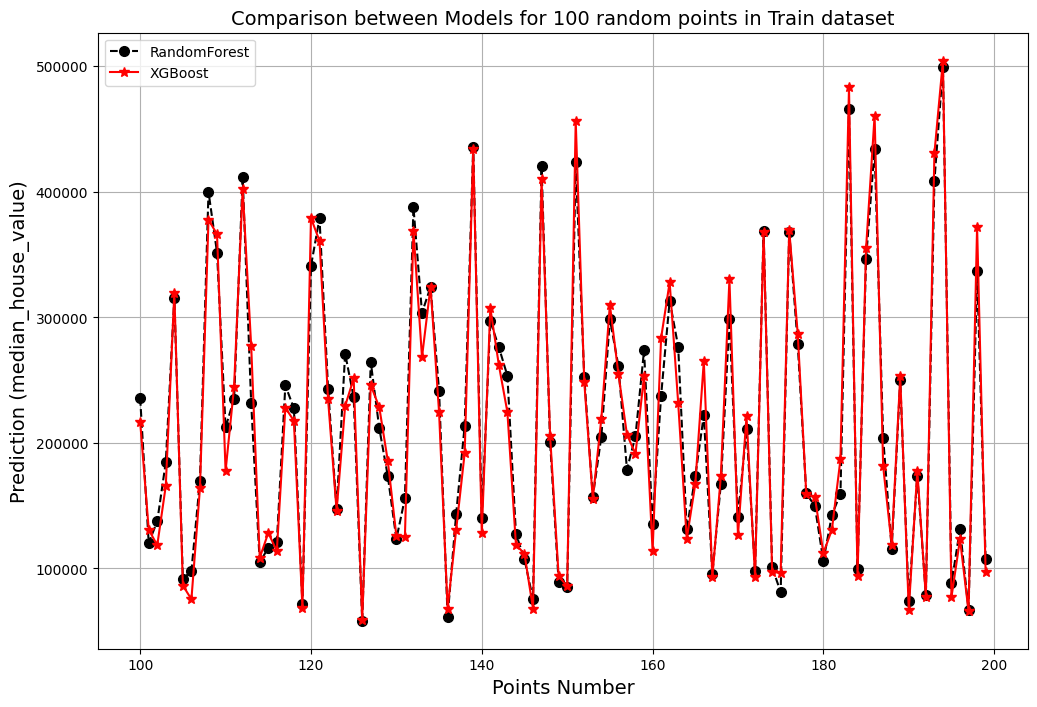

In [117]:
x_x = np.arange(100,200)
plt.figure(figsize=(12,8))
plt.plot(x_x,y_pred_forest_tuned[100:200], 'ko--', markersize= 7, label='RandomForest')
plt.plot(x_x,y_pred_best_xgb[100:200], 'r*-', markersize= 7, label='XGBoost')
plt.title('Comparison between Models for 100 random points in Train dataset', 
          fontsize=14)
plt.xlabel('Points Number', fontsize=14)
plt.ylabel('Prediction (median_house_value)', fontsize=14)

plt.legend()
plt.grid('on')
plt.show

# Model Selection

In [118]:
joblib.dump(best_xgb, 'model_XGBoost.pkl')

['model_XGBoost.pkl']

In [119]:
loaded_model = joblib.load('model_XGBoost.pkl')

# Inference

In [ ]:
y_pred_test = loaded_model.predict(X_test_final)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred_test))